# CAPSTONE PROJECT 
 - Student- Sabina Bains
 - Presentation Date- 10/01/2022
 - Instructor- Abhineet Kulkarni

# BUSINESS UNDERSTANDING ------------------------------------------------------------------------------------------

A picture is said to be worth a thousand words, but does that saying apply to album art anymore? Before streaming services such as Spotify became the preferred format for music consumption,
listeners would peruse the aisles of music stores, scanning the album artwork of CD's and Vinyl Records. During this time, album art likely affected what users chose to purchase. Our goal is to predict whether album art still plays a role in the success of the album's music. 


active vs passive listening. 
album art tells a story and gives context

# DATA UNDERSTANDING ------------------------------------------------------------------------------------------------

In [1]:
!pip3 install spotipy --upgrade
!pip3 install pillow

Requirement already up-to-date: spotipy in /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages (2.20.0)


#### Importing Packages

In [356]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
 
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import re
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

# changing colors of output
COLOR = 'white'
mpl.rcParams['text.color'] = 'grey'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd

# load and show an image with Pillow
from PIL import Image

from matplotlib import image
from matplotlib import pyplot

import requests

from IPython.display import Image

import collections

#### Using credentials to pull album art and popularity score (target variable) from Spotify's API (SpotiPy)

In [343]:
# User will have to create their own spotipy account and put their own CID and SECRET keys into the following variables
creds  = pd.read_csv('data/spotipy_credentials.csv', header = None)

cid    = creds[1][0]
secret = creds[1][1]

In [ ]:
# Accessing API
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [344]:
# Creating list of playlists with independent artists to pull album art data from
fresh_finds_playlists = [
'https://open.spotify.com/playlist/37i9dQZF1DWT0upuUFtT7o',
'https://open.spotify.com/playlist/37i9dQZF1DWUFAJPVM3HTX',
'https://open.spotify.com/playlist/37i9dQZF1DX3u9TSHqpdJC',
'https://open.spotify.com/playlist/37i9dQZF1DWW4igXXl2Qkp',
'https://open.spotify.com/playlist/37i9dQZF1DX78toxP7mOaJ',
'https://open.spotify.com/playlist/37i9dQZF1DXdS3lvGe1GrT',
'https://open.spotify.com/playlist/37i9dQZF1DWYUfsq4hxHWP',
'https://open.spotify.com/playlist/37i9dQZF1DX6bBjHfdRnza',
'https://open.spotify.com/playlist/37i9dQZF1DX8C585qnMYHP',
'https://open.spotify.com/playlist/37i9dQZF1DXcWL5K0oNHcG',
'https://open.spotify.com/playlist/37i9dQZF1DWWjGdmeTyeJ6'
]

In [345]:
# looping through playlist lists to pull all tracks from each list
playlist_uris = []

for playlist in fresh_finds_playlists:
    playlist_uris.append(playlist.split("/")[-1].split("?")[0])

In [183]:
# Creating dict to append to
data={}
data['track_name'] = []
data['popularity'] = []
data['album_url'] = []


# looping through each playlist
for playlist in playlist_uris:
    
    # looping through each track in playlist to append name, popularity rating (our target variable), and album url to pull artwork.
    for track in sp.playlist_tracks(playlist)["items"]:
        # track name
        data['track_name'].append(track["track"]["name"])
        # popularity of the track
        data['popularity'].append(track["track"]["popularity"])
        # Cover Art URL
        data['album_url'].append(track["track"]['album']['images'][0]['url'])

In [184]:
# creating dataframe from above dictionary
df = pd.DataFrame(data)
# resetting index
df = df.drop_duplicates().reset_index(drop = True)

In [186]:
# cleaning track names of characters for cleaner import and export
df['track_name_cleaned'] = df.track_name.str.replace("(?i)[^0-9a-z!?.;,@' -]",'')
df['track_name_cleaned'] = df.track_name_cleaned.str.replace('.','')
df['track_name_cleaned'] = df.track_name_cleaned.str.replace('*','')

In [187]:
# # Going through each URL, downloading the image, and saving it to album_art folder
# error_list = []
# for name, url in zip(df['track_name_cleaned'], df['album_url']):
    
#     try:
#         img_data = requests.get(url).content
#         with open(f'data/album_art/{name}.jpg', 'wb') as handler:
#             handler.write(img_data)
#     except:
#         error_list.append(name)

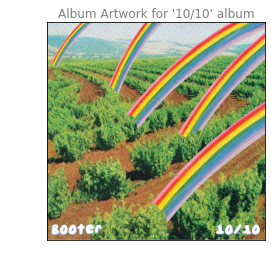

In [350]:
# Displaying example of photo

plt.title("Album Artwork for '10/10' album")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("data/album_art/1010.jpg")
plt.imshow(image)
plt.show()

In [190]:
# pulling pathnames of all album art to readin in numpy format
list_of_album_files = os.listdir("data/album_art/")

In [191]:
# importing saved album art files as values in dictionary, with key being the track name. This is so we can later tie the target variable to the features (album art)

# initializing dict
image_dict = {}

# looping through each album art saved
for file in list_of_album_files:
    
    # assigning track name as key, and value as matrix form of album art (Height, Width, Depth)
    try:
        image_dict[file.split('.jpg')[0]] = (image.imread('data/album_art/'+file))
        
        # Not including image if it is not in uniform shape
        if image_dict[file.split('.jpg')[0]].shape != (640,640,3):
            del image_dict[file.split('.jpg')[0]]
            
    # created error list to observe files that were not read in properly        
    except:
        error_list.append(file)

In [192]:
# filtering down dataframe so that only the files that were read in properly are included. 
df = df.loc[df.track_name_cleaned.isin(image_dict.keys())]

In [355]:
# checking for duplicates
dups = df.loc[df.track_name_cleaned.duplicated() == True]['track_name_cleaned'].to_list() 
df.loc[df.track_name_cleaned.isin(dups)]

# removing duplicates
df = df.loc[~(df.track_name_cleaned.duplicated() == True)]

In [218]:
# sorting data by trackname to match album art with popularity score
df = df.sort_values(by='track_name_cleaned').reset_index(drop=True)

In [219]:
# 
image_list = []

for file in list_of_album_files:
    try:
        image_list.append(image.imread('data/album_art/'+file))
    except:
        pass

In [220]:
del_list = []

for key in image_dict.keys():
    if key in df.track_name_cleaned.to_list():
        pass
    else:
        del_list.append(key)

In [357]:
del_list

[]

In [221]:
for key in del_list:
    del image_dict[key]

In [236]:
# Sorting Dictionary to match DataFrame order
image_dict = collections.OrderedDict(sorted(image_dict.items()))

In [242]:
final_list = []
for k,v in image_dict.items():
    final_list.append(v)

In [245]:
X = np.array(final_list)

In [278]:
y = np.array(df.popularity).reshape(len(df.popularity), 1)

In [279]:
split_val = 100
X_train = X[:split_val]
X_test  = X[split_val:]
y_train = y[:split_val]
y_test  = y[split_val:]

In [251]:
X_train = X_train / 255
X_test  = X_test  / 255

In [252]:
input_shape = X_train[0]
input_shape.shape

(640, 640, 3)

In [253]:
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=1, input_shape =(640, 640, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(layers.Dense(1, activation='linear'))

In [254]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [264]:
history = model.fit(X_train, y_train, epochs=8, 
                    validation_data=(X_test, y_test))

Epoch 1/8
4/4 [==============================] - 254s 64s/step - loss: 151.7492 - mse: 151.7492 - val_loss: 202.4482 - val_mse: 202.4482
Epoch 2/8
4/4 [==============================] - 216s 54s/step - loss: 162.7771 - mse: 162.7771 - val_loss: 152.0656 - val_mse: 152.0656
Epoch 3/8
4/4 [==============================] - 201s 50s/step - loss: 138.9281 - mse: 138.9281 - val_loss: 149.0296 - val_mse: 149.0296
Epoch 4/8
4/4 [==============================] - 188s 47s/step - loss: 149.4039 - mse: 149.4039 - val_loss: 138.0354 - val_mse: 138.0354
Epoch 5/8
4/4 [==============================] - 200s 50s/step - loss: 111.4370 - mse: 111.4370 - val_loss: 131.6634 - val_mse: 131.6634
Epoch 6/8
4/4 [==============================] - 204s 51s/step - loss: 91.1147 - mse: 91.1147 - val_loss: 146.7579 - val_mse: 146.7579
Epoch 7/8
4/4 [==============================] - 458s 115s/step - loss: 143.7739 - mse: 143.7739 - val_loss: 163.5153 - val_mse: 163.5153
Epoch 8/8
4/4 [===========================

23/23 - 108s - loss: 137.8761 - mse: 137.8761


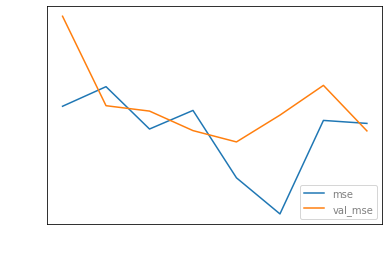

In [265]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('mse')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [266]:
y_hat = model.predict(X_test);

In [267]:
error = y_test - y_hat;

In [268]:
thr = 10;
numCorrect = sum(abs(error) < thr);
numValidationImages = len(y_test);

accuracy = numCorrect/numValidationImages

In [269]:
accuracy

array([0.57425743])

In [270]:
# model.evaluate(X_test,y_test)

In [271]:
squares = error**2;
rmse = np.sqrt(np.mean(squares))

(10.0, 55.0)

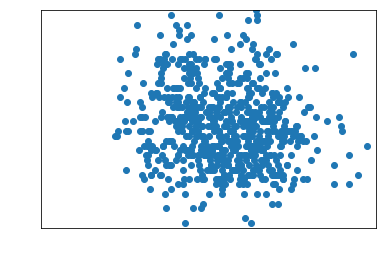

In [327]:
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

# plt.plot(np.linspace(10,55,10))

plt.xlim([10, 55])
plt.ylim([10, 55])

#### Changing Pixel Size

In [310]:
img2 = img.resize((30,30))

In [313]:
img2

In [316]:
img2.save('data/album_art_resized/test.jpg')

In [318]:
image.imread('data/album_art_resized/test.jpg').shape

(30, 30, 3)